In [1]:
import json, requests
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_bit_gold_aud_df(start_date, end_date, fill):
    url = f"http://localhost:9090/ganalysis/fill/{fill}/startdate/{start_date}/enddate/{end_date}"
    response = requests.get(url)
    if response.status_code == 200:
        data_string = response.json()
        data = json.loads(data_string)
        df = pd.DataFrame(data)
        print(f"success：{url}")
    return df

In [3]:
df_fill = get_bit_gold_aud_df('2016-09-13', '2021-09-10', True)

success：http://localhost:9090/ganalysis/fill/True/startdate/2016-09-13/enddate/2021-09-10


In [4]:
df_fill['Date'] = pd.to_datetime(df_fill['Date'])

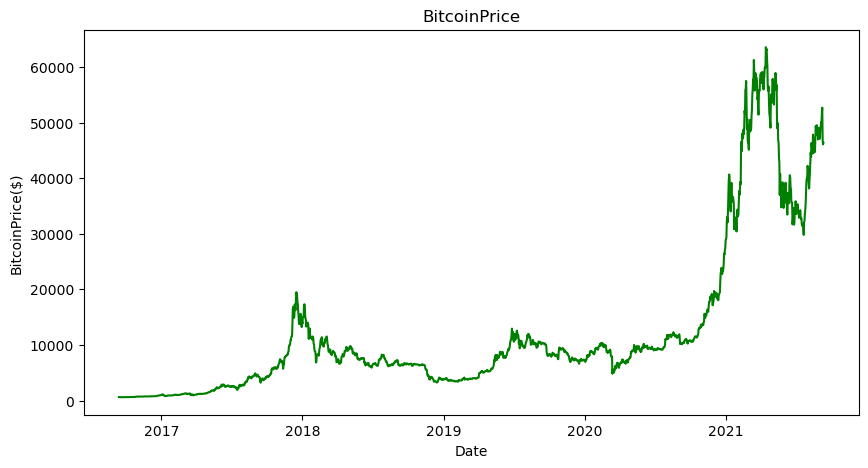

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df_fill['Date'], df_fill['BitcoinPrice'], 'g-')

locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.title('BitcoinPrice') 
plt.xlabel('Date') 
plt.ylabel('BitcoinPrice($)')

plt.show()

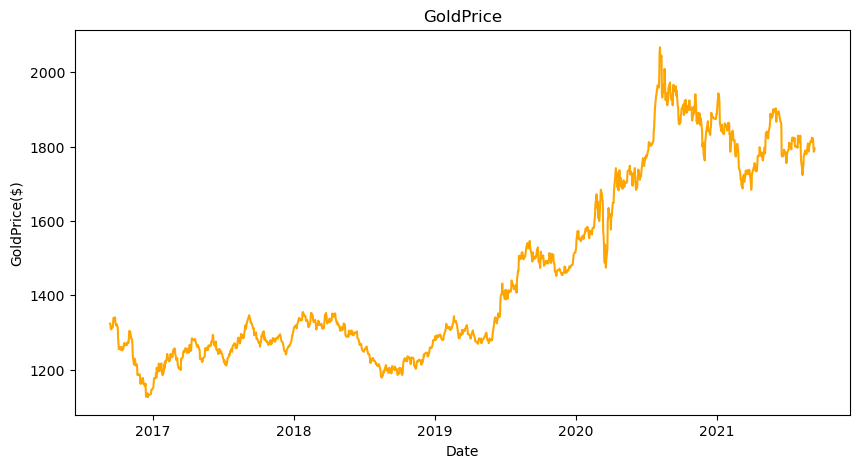

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df_fill['Date'], df_fill['GoldPrice'], 'orange')

locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.title('GoldPrice') 
plt.xlabel('Date') 
plt.ylabel('GoldPrice($)')

plt.show()

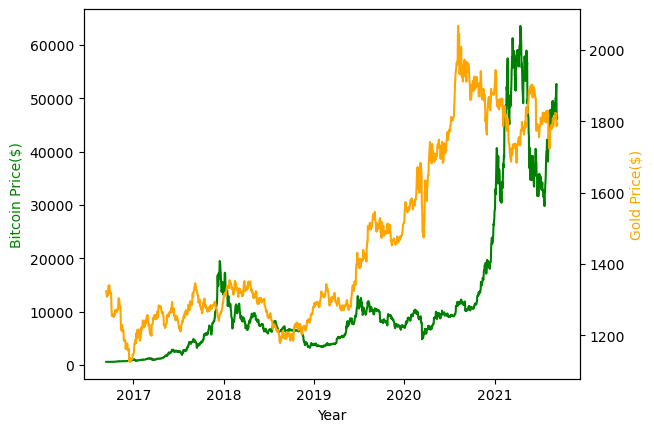

In [7]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 
ax1.plot(df_fill['Date'], df_fill['BitcoinPrice'], 'g-') 
ax2.plot(df_fill['Date'], df_fill['GoldPrice'], 'orange') 

ax1.set_xlabel('Year')
ax1.set_ylabel('Bitcoin Price($)', color='g')
ax2.set_ylabel('Gold Price($)', color='orange')

plt.show()

In [8]:
df_fill['GoldPrice_lag222'] = df_fill['GoldPrice'].shift(222) 
correlation_matrix = df_fill.corr()  
print(correlation_matrix)

                            Date  BitcoinPrice  GoldPrice  AUDtoUSD  \
Date                    1.000000      0.713474   0.880210 -0.355749   
BitcoinPrice            0.713474      1.000000   0.649381  0.228270   
GoldPrice               0.880210      0.649381   1.000000 -0.183024   
AUDtoUSD               -0.355749      0.228270  -0.183024  1.000000   
BitcoinPurchasingPower -0.695129     -0.435175  -0.470701  0.216367   
GoldPurchasingPower    -0.910624     -0.520897  -0.938314  0.498547   
GoldPrice_lag222        0.841113      0.880381   0.820350  0.109342   

                        BitcoinPurchasingPower  GoldPurchasingPower  \
Date                                 -0.695129            -0.910624   
BitcoinPrice                         -0.435175            -0.520897   
GoldPrice                            -0.470701            -0.938314   
AUDtoUSD                              0.216367             0.498547   
BitcoinPurchasingPower                1.000000             0.515211   
GoldP

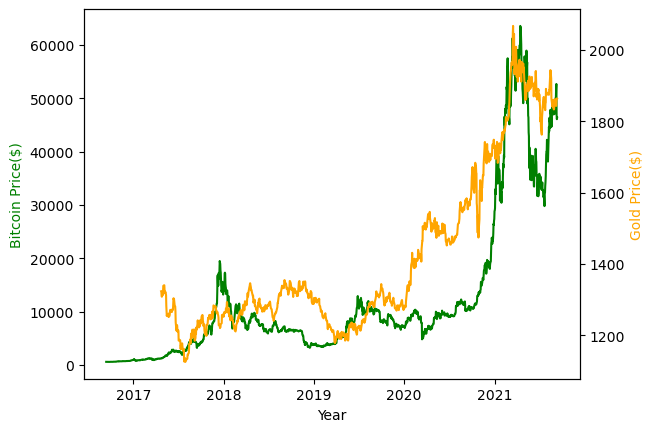

In [9]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 
ax1.plot(df_fill['Date'], df_fill['BitcoinPrice'], 'g-') 
ax2.plot(df_fill['Date'], df_fill['GoldPrice_lag222'], 'orange') 

ax1.set_xlabel('Year')
ax1.set_ylabel('Bitcoin Price($)', color='g')
ax2.set_ylabel('Gold Price($)', color='orange')

plt.show()

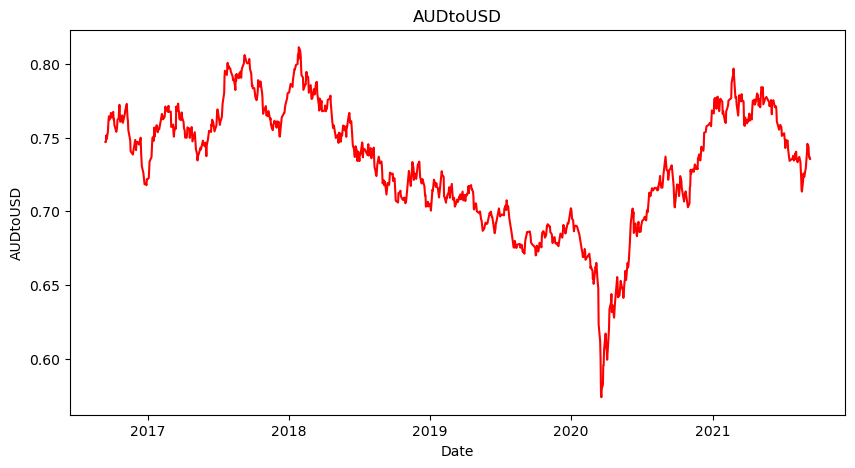

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df_fill['Date'], df_fill['AUDtoUSD'], 'red')

locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.title('AUDtoUSD') 
plt.xlabel('Date') 
plt.ylabel('AUDtoUSD')

plt.show()

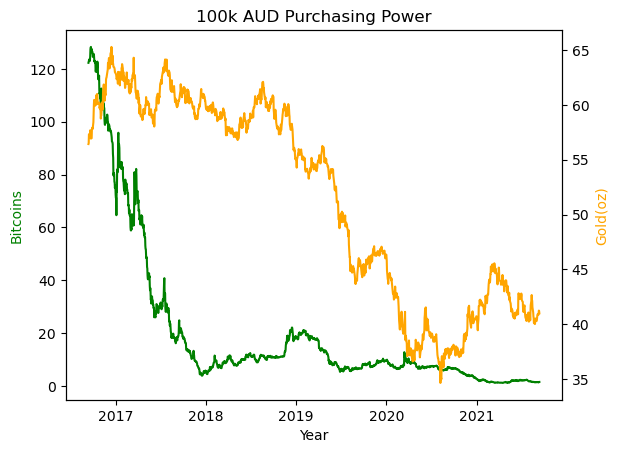

In [12]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  
ax1.plot(df_fill['Date'], df_fill['BitcoinPurchasingPower'], 'g-') 
ax2.plot(df_fill['Date'], df_fill['GoldPurchasingPower'], 'orange') 

ax1.set_xlabel('Year')
ax1.set_ylabel('Bitcoins', color='g')
ax2.set_ylabel('Gold(oz)', color='orange')
plt.title('100k AUD Purchasing Power')

plt.show()

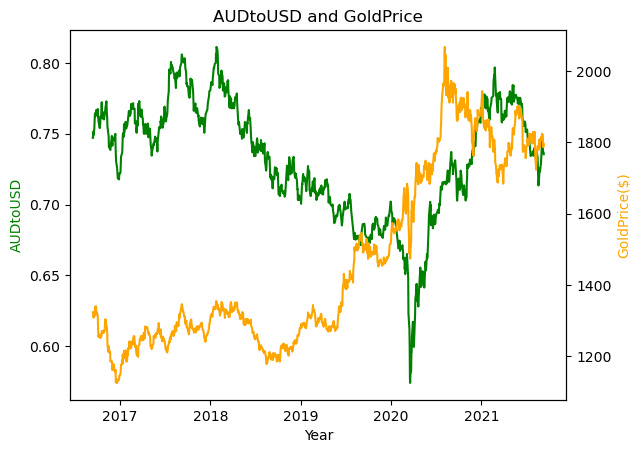

In [20]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  
ax1.plot(df_fill['Date'], df_fill['AUDtoUSD'], 'g-') 
ax2.plot(df_fill['Date'], df_fill['GoldPrice'], 'orange') 

ax1.set_xlabel('Year')
ax1.set_ylabel('AUDtoUSD', color='g')
ax2.set_ylabel('GoldPrice($)', color='orange')
plt.title('AUDtoUSD and GoldPrice')

plt.show()

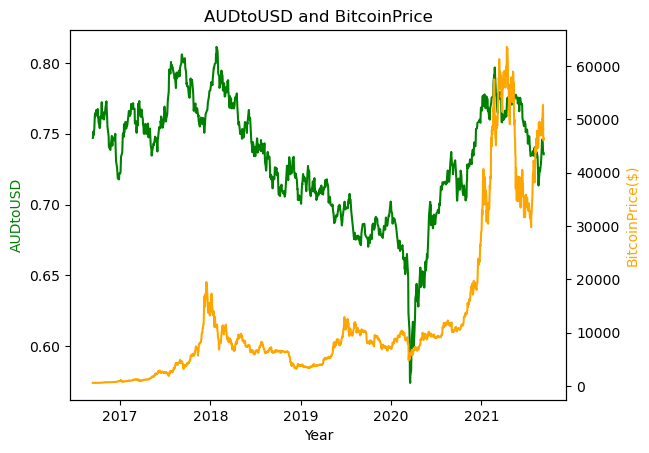

In [21]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  
ax1.plot(df_fill['Date'], df_fill['AUDtoUSD'], 'g-') 
ax2.plot(df_fill['Date'], df_fill['BitcoinPrice'], 'orange') 

ax1.set_xlabel('Year')
ax1.set_ylabel('AUDtoUSD', color='g')
ax2.set_ylabel('BitcoinPrice($)', color='orange')
plt.title('AUDtoUSD and BitcoinPrice')

plt.show()

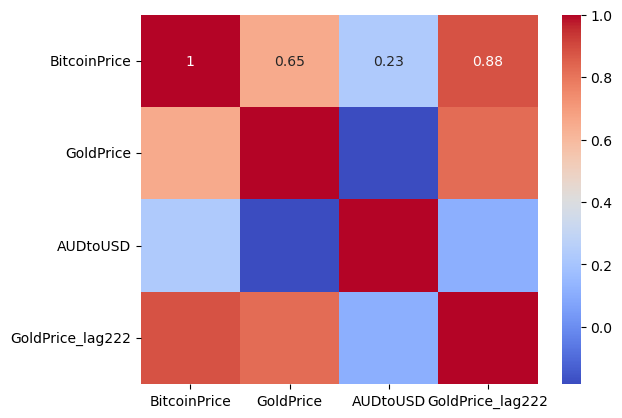

For 'AUDtoUSD' , most_positive_correlated_column: BitcoinPrice (r = 0.23)
For 'AUDtoUSD' , most_negative_correlated_column: GoldPrice (r = -0.18)


In [13]:
df_corr = df_fill.drop('Date', axis=1)
df_corr = df_corr.drop('GoldPurchasingPower', axis=1)
df_corr = df_corr.drop('BitcoinPurchasingPower', axis=1)

correlation_matrix = df_corr.corr()
target_column = 'AUDtoUSD'
corrs = correlation_matrix[target_column].drop(target_column)

most_positive_correlated_column = corrs.idxmax()
most_negative_correlated_column = corrs.idxmin()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
print(f"For '{target_column}' , most_positive_correlated_column: {most_positive_correlated_column} (r = {corrs.max():.2f})")
print(f"For '{target_column}' , most_negative_correlated_column: {most_negative_correlated_column} (r = {corrs.min():.2f})")